In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    
    def __init__(self, num_iterations=500, learning_rate=0.01, tol=1e-4):
        self.n_iter = num_iterations
        self.lr = learning_rate
        self.tol = tol
    
    
    def _init_params(self, n_features):
        '''
        This function creates a vector of zeros of shape (n_features, 1) for w and initializes b to 0
        '''
        self.w_ = np.zeros((n_features, 1))
        self.b_ = 0
    
    
    def _calc_cost(self, X, y):
        '''
        This function calculates cost
        X.shape: (n_samples, n_features)
        y.shape: (n_samples, 1)
        '''
        m = X.shape[0]
        y_hat = np.dot(X, self.w_) + self.b_
        cost = np.dot((y_hat - y).T, y_hat - y) / (2*m)
        return np.squeeze(cost), y_hat
    
    
    def fit(self, X_train, y_train):
        '''
        This function optimizes parameter vector w and bias b by running a gradient descent algorithm
        X_train.shape: (n_samples, n_features)
        y_train.shape: (n_samples, 1)
        '''
        n_features = X_train.shape[1]
        n_samples = X_train.shape[0]
        self._init_params(n_features)
        
        prev_cost, y_hat = self._calc_cost(X_train, y_train)
        self.costs_ = []
        
        for i in range(self.n_iter):
            
            dw = np.dot(X_train.T, (y_hat - y_train)) / n_samples
            db = np.sum(y_hat - y_train) / n_samples
            
            self.w_ -= self.lr * dw
            self.b_ -= self.lr * db
            
            #write cost every epoch
            if i % n_samples == 0:
                print(f'\t------Epoch: {i // n_samples}------')
                print(f'Current weights: {self.w_}\nCurrent bias: {self.b_}\nCurrent cost: {prev_cost}\n')
                self.costs_.append(prev_cost)
            
            cost, y_hat = self._calc_cost(X_train, y_train)
            
            if abs(prev_cost - cost) < self.tol:
                break
            prev_cost = cost
    
    
    def predict(self, X_test):
        '''
        Make a prediction using learned parameters w and b
        '''
        y_hat = np.dot(X_test, self.w_) + self.b_
        return y_hat

In [3]:
def load_data():
    train_data = np.genfromtxt('lab_1_train.csv', delimiter=',', skip_header=1, usecols=(1, 2))
    test_data = np.genfromtxt('lab_1_test.csv', delimiter=',', skip_header=1, usecols=(1, 2))
    
    X_train, y_train = train_data[:, 0], train_data[:, 1]
    X_test, y_test = test_data[:, 0], test_data[:, 1]
    
    return X_train[:, np.newaxis], X_test[:, np.newaxis], y_train[:, np.newaxis], y_test[:, np.newaxis]

In [4]:
#load the data
X_train, X_test, y_train, y_test = load_data()

#explore the shapes
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (60, 1)
y_train.shape: (60, 1)
X_test.shape: (40, 1)
y_test.shape: (40, 1)


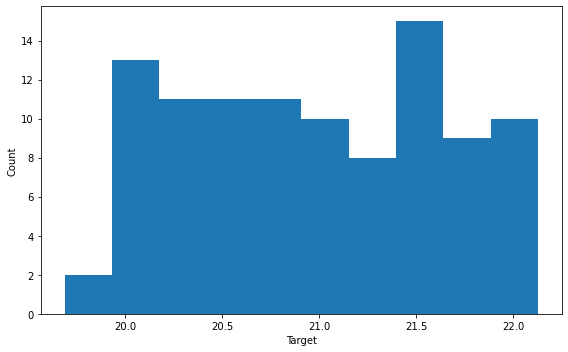

In [5]:
#histogram of the quantity we want to predict
plt.figure(figsize=(8, 5))
plt.hist(np.r_[y_train, y_test])
plt.xlabel("Target")
plt.ylabel("Count")
plt.tight_layout()

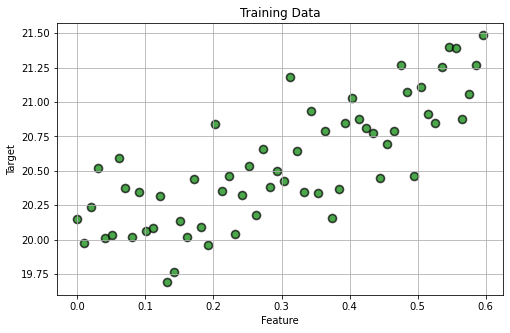

In [6]:
#visualize training data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c='g', s=64, alpha=.7, linewidths=1.65, edgecolors='black')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training Data')
plt.grid(True)

In [7]:
#standardize the data
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train - mu) / std
X_test_std = (X_test - mu) / std

In [8]:
lreg = LinearRegression(num_iterations=1200)
lreg.fit(X_train_std, y_train)

	------Epoch: 0------
Current weights: [[0.00346149]]
Current bias: 0.20549563191038453
Current cost: 211.23870094240348

	------Epoch: 1------
Current weights: [[0.15864548]]
Current bias: 9.418171492815125
Current cost: 63.266309848762724

	------Epoch: 2------
Current weights: [[0.24355543]]
Current bias: 14.458948284302181
Current cost: 18.966277499727184

	------Epoch: 3------
Current weights: [[0.29001447]]
Current bias: 17.217042788573515
Current cost: 5.703716479923983

	------Epoch: 4------
Current weights: [[0.31543485]]
Current bias: 18.726152516927026
Current cost: 1.7331657720116278

	------Epoch: 5------
Current weights: [[0.32934377]]
Current bias: 19.551871928892165
Current cost: 0.5444607473513767

	------Epoch: 6------
Current weights: [[0.33695413]]
Current bias: 20.00366978989989
Current cost: 0.18858577191365083

	------Epoch: 7------
Current weights: [[0.34111819]]
Current bias: 20.25087399056821
Current cost: 0.08204378250883944

	------Epoch: 8------
Current wei

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


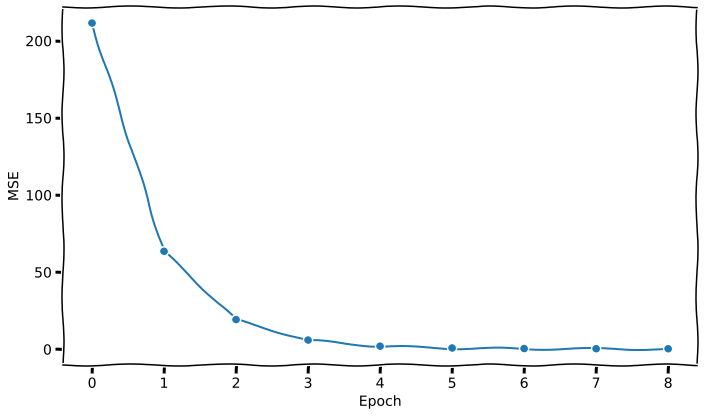

In [9]:
#plot the learning curve
plt.figure(figsize=(10, 6))
with plt.xkcd():
    plt.plot(range(len(lreg.costs_)), lreg.costs_, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.tight_layout()

In [10]:
#MSE for test data
cost, _ = lreg._calc_cost(X_test_std, y_test)
print(f'Cost function for test set: {cost}')

Cost function for test set: 0.048217203123177614


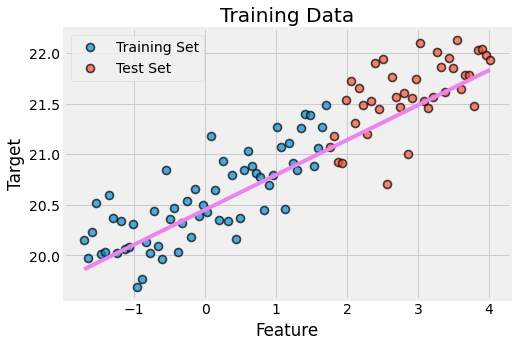

In [11]:
#plot training, test data and learned line
data = np.r_[X_train_std, X_test_std]
x_min, x_max = data.min(), data.max()
xx = np.linspace(x_min, x_max, num=15)[:, np.newaxis]
y_pred = lreg.predict(xx)

plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
plt.scatter(X_train_std, y_train, s=64, alpha=.7, linewidths=1.65, edgecolors='black', label='Training Set')
plt.scatter(X_test_std, y_test, s=64, alpha=.7, linewidths=1.65, edgecolors='black', label='Test Set')
plt.plot(xx, y_pred, c='violet')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training Data')
plt.legend(loc='best')